In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform

In [583]:
link_methods = ['single', 'complete', 'average']
metrics = ['seuclidean', 'mahalanobis', 'chebyshev']

In [584]:
df = (pd.read_excel('data.xlsx', na_values='-').set_index('Country')
      .apply(pd.to_numeric, errors='coerce').fillna(0))
df.head()

,All,Work,OrgTour,Private
Country,,,,
Албанія,4,0.0,0.0,4.0
Азербайджан,16791,0.0,0.0,16791.0
Австрія,96809,663.0,11639.0,84507.0
Вірменія,12433,158.0,1367.0,10908.0
Бельгія,17487,29.0,0.0,17458.0


## Візуалізація даних

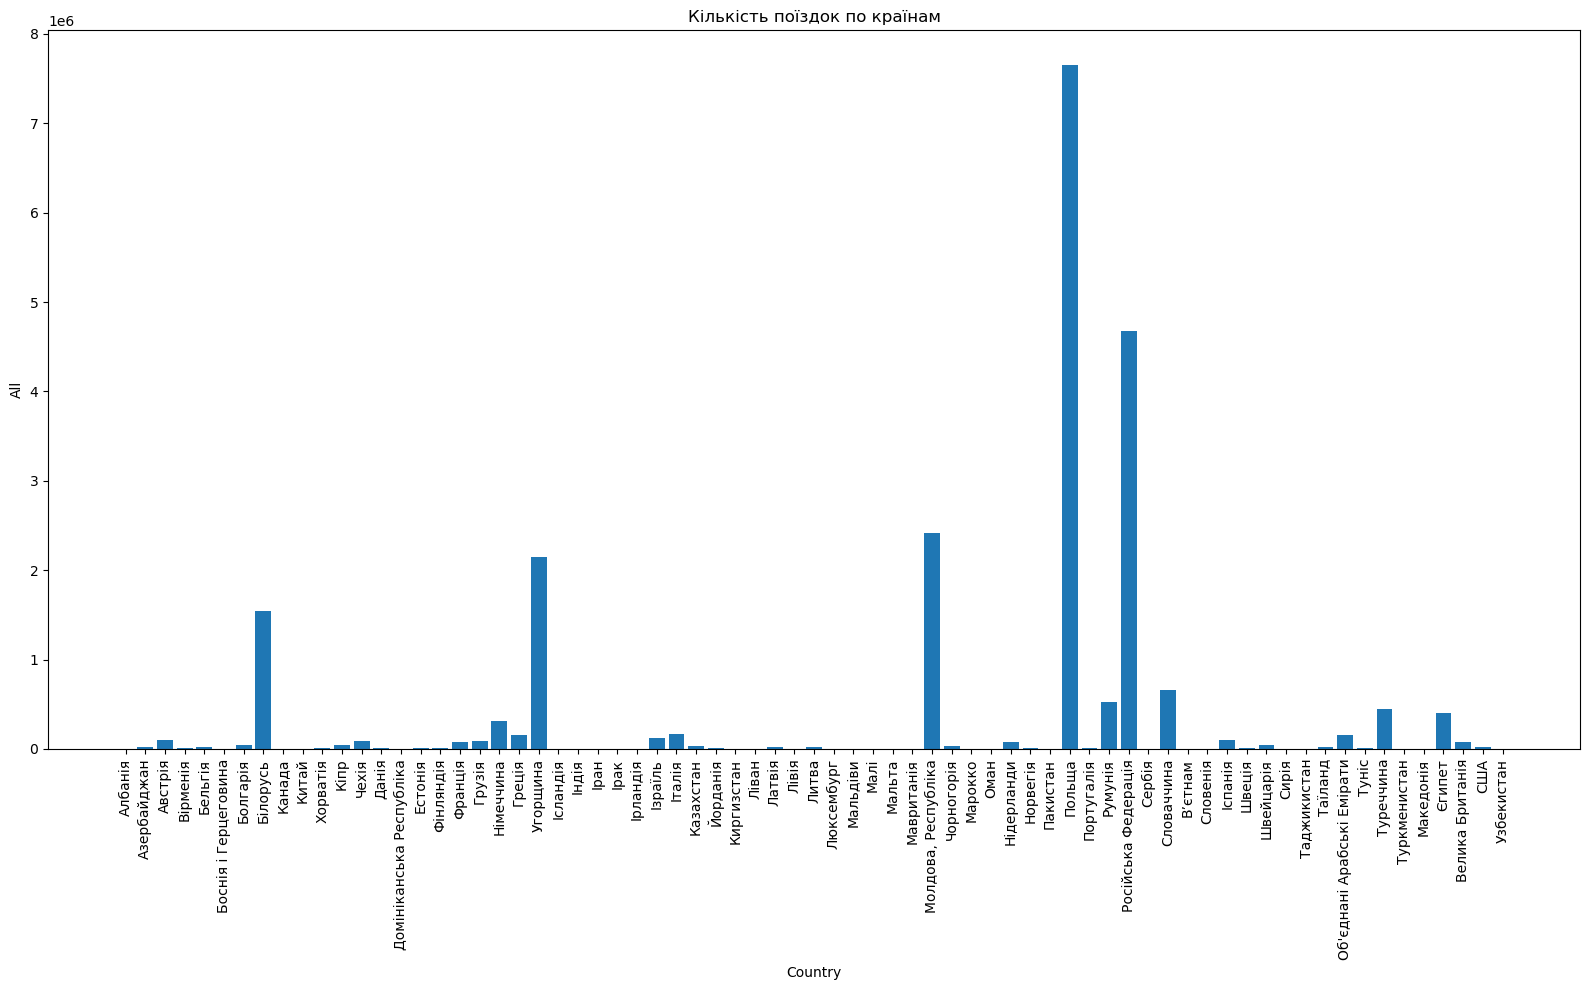

In [585]:
plt.figure(figsize=(16, 10))
plt.bar(df.index, df['All'])
plt.xlabel('Country')
plt.ylabel('All')
plt.title('Кількість поїздок по країнам')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Матриця відстаней

In [586]:
def distance_matrix(metric):
    distances = pdist(df, metric=metric)
    return pd.DataFrame(
        squareform(distances),
        index=df.index,
        columns=df.index
    )

### спеціальна Евклідова

In [587]:
seuclidean_distances = distance_matrix('seuclidean')
seuclidean_distances

Country,Албанія,Азербайджан,Австрія,Вірменія,Бельгія,Боснія і Герцеговина,Болгарія,Білорусь,Канада,Китай,...,Таїланд,Об'єднані Арабські Емірати,Туніс,Туреччина,Туркменистан,Македонія,Єгипет,Велика Британія,США,Узбекистан
Country,,,,,,,,,,,,,,,,,,,,,
Албанія,0.000000,0.021364,1.665580,0.196025,0.022352,0.000080,1.156536,3.508920,0.001591,0.000240,...,0.031209,1.358087,0.014432,5.173360,0.002231,0.001713,3.582164,0.097467,0.026323,0.029395
Азербайджан,0.021364,0.000000,1.664238,0.195572,0.002476,0.021368,1.155741,3.497212,0.019773,0.021368,...,0.009845,1.355112,0.006932,5.171141,0.019133,0.021388,3.579285,0.076103,0.004959,0.032330
Австрія,1.665580,1.664238,0.000000,1.469679,1.664117,1.665578,0.544276,2.981774,1.665471,1.665573,...,1.663712,0.329825,1.664644,3.510070,1.665428,1.663870,1.924542,1.661682,1.663966,1.636544
Вірменія,0.196025,0.195572,1.469679,0.000000,0.195467,0.196020,0.961894,3.404006,0.195911,0.196010,...,0.196148,1.162892,0.195463,4.977439,0.195869,0.194318,3.386824,0.212212,0.195800,0.167064
Бельгія,0.022352,0.002476,1.664117,0.195467,0.000000,0.022348,1.155329,3.495134,0.020770,0.022331,...,0.009273,1.354958,0.008137,5.170928,0.020134,0.022373,3.579143,0.075271,0.004704,0.032821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Македонія,0.001713,0.021388,1.663870,0.194318,0.022373,0.001715,1.154848,3.508089,0.002307,0.001730,...,0.031212,1.356387,0.014489,5.171655,0.002777,0.000000,3.580462,0.097437,0.026335,0.027716
Єгипет,3.582164,3.579285,1.924542,3.386824,3.579143,3.582164,2.453413,3.360569,3.581945,3.582161,...,3.578000,2.224214,3.580205,1.607353,3.581857,3.580462,0.000000,3.570049,3.578634,3.552873
Велика Британія,0.097467,0.076103,1.661682,0.212212,0.075271,0.097471,1.156117,3.456254,0.095876,0.097470,...,0.066258,1.347219,0.083035,5.163947,0.095236,0.097437,3.570049,0.000000,0.071143,0.095436


### Махалановіса

In [588]:
malahobis_distances = distance_matrix('mahalanobis')
malahobis_distances

Country,Албанія,Азербайджан,Австрія,Вірменія,Бельгія,Боснія і Герцеговина,Болгарія,Білорусь,Канада,Китай,...,Таїланд,Об'єднані Арабські Емірати,Туніс,Туреччина,Туркменистан,Македонія,Єгипет,Велика Британія,США,Узбекистан
Country,,,,,,,,,,,,,,,,,,,,,
Албанія,0.000000,0.035191,1.787636,0.210954,0.033618,0.000184,1.318748,3.361444,0.002656,0.000537,...,0.052374,1.416726,0.023848,5.481097,0.003742,0.001864,3.760888,0.160779,0.042914,0.030538
Азербайджан,0.035191,0.000000,1.795852,0.223252,0.003974,0.037002,1.335947,3.406032,0.032646,0.037150,...,0.017164,1.422592,0.011781,5.491966,0.032327,0.035474,3.757043,0.129087,0.008169,0.045233
Австрія,1.787636,1.795852,0.000000,1.577638,1.796283,1.788328,0.653651,3.095617,1.787697,1.787594,...,1.799757,0.438328,1.793489,3.699631,1.787984,1.785838,2.002010,1.831470,1.798327,1.758270
Вірменія,0.210954,0.223252,1.577638,0.000000,0.222572,0.210917,1.115000,3.455208,0.211788,0.210957,...,0.230675,1.215187,0.218684,5.266025,0.211985,0.209078,3.555103,0.300363,0.226779,0.182681
Бельгія,0.033618,0.003974,1.796283,0.222572,0.000000,0.031685,1.334696,3.504876,0.031100,0.033792,...,0.019233,1.422584,0.009141,5.482387,0.028902,0.033903,3.751603,0.130866,0.011559,0.043874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Македонія,0.001864,0.035474,1.785838,0.209078,0.033903,0.001860,1.316955,3.249257,0.003592,0.001906,...,0.052635,1.418220,0.024152,5.478135,0.004562,0.000000,3.758386,0.167958,0.043192,0.028530
Єгипет,3.760888,3.757043,2.002010,3.555103,3.751603,3.754542,2.623323,4.137276,3.761158,3.754553,...,3.761260,2.331810,3.760311,1.829080,3.755347,3.758386,0.000000,3.772132,3.759161,3.725191
Велика Британія,0.160779,0.129087,1.831470,0.300363,0.130866,0.167803,1.402690,3.458545,0.159998,0.167950,...,0.110169,1.441771,0.139568,5.516697,0.159677,0.167958,3.772132,0.000000,0.119615,0.164555


## Чебишева

In [589]:
chebyshev_distances = distance_matrix('chebyshev')
chebyshev_distances

Country,Албанія,Азербайджан,Австрія,Вірменія,Бельгія,Боснія і Герцеговина,Болгарія,Білорусь,Канада,Китай,...,Таїланд,Об'єднані Арабські Емірати,Туніс,Туреччина,Туркменистан,Македонія,Єгипет,Велика Британія,США,Узбекистан
Country,,,,,,,,,,,,,,,,,,,,,
Албанія,0.0,16787.0,96805.0,12429.0,17483.0,4.0,47476.0,1538156.0,1250.0,4.0,...,24523.0,161724.0,11340.0,450545.0,1753.0,41.0,400423.0,76586.0,20684.0,5164.0
Азербайджан,16787.0,0.0,80018.0,5883.0,696.0,16791.0,30689.0,1521369.0,15537.0,16791.0,...,7736.0,144937.0,5447.0,433758.0,15034.0,16758.0,383636.0,59799.0,3897.0,11824.0
Австрія,96805.0,80018.0,0.0,84376.0,79322.0,96808.0,49329.0,1441351.0,95555.0,96806.0,...,72282.0,67498.0,85465.0,353740.0,95052.0,96764.0,303618.0,20219.0,76121.0,91641.0
Вірменія,12429.0,5883.0,84376.0,0.0,6550.0,12432.0,35047.0,1525727.0,11179.0,12430.0,...,13619.0,149295.0,1367.0,438116.0,10676.0,12388.0,387994.0,65682.0,9780.0,7265.0
Бельгія,17483.0,696.0,79322.0,6550.0,0.0,17486.0,29993.0,1520673.0,16233.0,17484.0,...,7069.0,144241.0,6143.0,433062.0,15730.0,17442.0,382940.0,59132.0,3230.0,12491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Македонія,41.0,16758.0,96764.0,12388.0,17442.0,44.0,47435.0,1538115.0,1221.0,42.0,...,24494.0,161683.0,11311.0,450504.0,1724.0,0.0,400382.0,76557.0,20655.0,5123.0
Єгипет,400423.0,383636.0,303618.0,387994.0,382940.0,400426.0,352947.0,1137733.0,399173.0,400424.0,...,375900.0,238699.0,389083.0,50122.0,398670.0,400382.0,0.0,323837.0,379739.0,395259.0
Велика Британія,76586.0,59799.0,20219.0,65682.0,59132.0,76590.0,39523.0,1461570.0,75336.0,76590.0,...,52063.0,85138.0,65246.0,373959.0,74833.0,76557.0,323837.0,0.0,55902.0,71623.0


In [590]:
distances_dict = {
    'seuclidean': seuclidean_distances.to_numpy(),
    'mahalanobis': malahobis_distances.to_numpy(),
    'chebyshev': chebyshev_distances.to_numpy()
}

## Таблиця кофенетичних кореляційних коефіцієнтів

In [591]:
def get_coeff(distances, metric):
    dist = squareform(distances)
    Z = linkage(dist, method=metric)
    return cophenet(Z, dist)[0], Z

In [592]:
coeff_table = pd.DataFrame(index=metrics, columns=link_methods)
z_values = pd.DataFrame(index=metrics, columns=link_methods)
for metric in metrics:
    distances = distances_dict[metric]

    for method in link_methods:
        c, z = get_coeff(distances, method)
        coeff_table.loc[metric, method] = c
        z_values.loc[metric, method] = z

coeff_table

,single,complete,average
seuclidean,0.969232,0.955383,0.987613
mahalanobis,0.951673,0.970434,0.977114
chebyshev,0.986915,0.964826,0.965153


In [593]:
max_value = coeff_table.max().max()
best_metric, best_method = coeff_table.stack().idxmax()

print(f"Найбільше значення: {max_value:.3f}")
print(f"найкраща метрика: {best_metric}")
print(f"найкраший метод зʼєднання: {best_method}")

min_value = coeff_table.min().min()
worst_metric, worst_method = coeff_table.stack().idxmin()

print(f"Найменше значення: {min_value:.3f}")
print(f"найгірша метрика: {worst_metric}")
print(f"найгірший метод зʼєднання: {worst_method}")

Найбільше значення: 0.988
найкраща метрика: seuclidean
найкраший метод зʼєднання: average
Найменше значення: 0.952
найгірша метрика: mahalanobis
найгірший метод зʼєднання: single


## Кластеризація

### Визначення кількості кластерів

In [594]:
distances = distances_dict[best_metric]
Z = z_values.loc[best_metric, best_method]

threshold = np.mean(Z[:, 2]) + np.std(Z[:, 2])
clusters_threshold = fcluster(Z, threshold, criterion='distance')
k = len(np.unique(clusters_threshold))
print(f"Кількість кластерів: {k}")

Кількість кластерів: 6


In [595]:
clusters = pd.Series(clusters_threshold, index=df.index, name='Cluster')

In [596]:
colors = plt.cm.rainbow(np.linspace(0, 1, k))

def link_color_func(n):
    cluster_idx = n % k
    return matplotlib.colors.rgb2hex(colors[cluster_idx])

def color_clusters(val):
    cluster_id = int(val % k)
    color = matplotlib.colors.rgb2hex(colors[cluster_id-1])
    return f'background-color: {color}; opacity: 0.5'

### Внутрішньокластерна дисперсія

In [597]:
dispersion_dict = {}
centers_dict = {}

for cluster_id in np.unique(clusters):
    cluster_data = df[clusters == cluster_id]

    centroid = cluster_data.mean()

    squared_distances = ((cluster_data - centroid) ** 2).sum(axis=1)

    dispersion = squared_distances.mean()

    dispersion_dict[cluster_id] = dispersion
    centers_dict[cluster_id] = centroid['All']

dispersion_df = pd.DataFrame({
    'Cluster': list(dispersion_dict.keys()),
    'Size': [sum(clusters == c_id) for c_id in dispersion_dict.keys()],
    'Dispersion': list(dispersion_dict.values()),
    'Center': list(centers_dict.values()),
})

styled_df = dispersion_df.style.map(
    color_clusters,
    subset=['Cluster']
)

styled_df

,Cluster,Size,Dispersion,Center
0,1,3,32619042709.777775,334087.333333
1,2,2,35953012659.000000,2286840.500000
2,3,63,24900759860.085159,47543.269841
3,4,1,0.000000,1538160.000000
4,5,1,0.000000,4671321.000000
5,6,1,0.000000,7657021.000000


### Відстань між центрами

In [598]:
dispersion_df['Center'] = dispersion_df['Center'].astype(float)
center_distances_df = pd.DataFrame(index=dispersion_df['Cluster'], columns=dispersion_df['Cluster'], dtype=float).fillna(0)
for i in range(len(dispersion_df)):
    for j in range(len(dispersion_df)):
        if i != j:
            center_distances_df.iloc[i, j] = abs(dispersion_df['Center'].iloc[i] - dispersion_df['Center'].iloc[j])
center_distances_df

Cluster,1,2,3,4,5,6
Cluster,,,,,,
1,0.000000e+00,1.952753e+06,2.865441e+05,1.204073e+06,4.337234e+06,7.322934e+06
2,1.952753e+06,0.000000e+00,2.239297e+06,7.486805e+05,2.384480e+06,5.370180e+06
3,2.865441e+05,2.239297e+06,0.000000e+00,1.490617e+06,4.623778e+06,7.609478e+06
4,1.204073e+06,7.486805e+05,1.490617e+06,0.000000e+00,3.133161e+06,6.118861e+06
5,4.337234e+06,2.384480e+06,4.623778e+06,3.133161e+06,0.000000e+00,2.985700e+06
6,7.322934e+06,5.370180e+06,7.609478e+06,6.118861e+06,2.985700e+06,0.000000e+00


In [599]:
dispersion_df['Center'] = dispersion_df['Center'].astype(float)
c_df = clusters.to_frame()
c_df = c_df.join(df['All'].rename('Value'))

c_df['DistanceToCenter'] = c_df.apply(
    lambda row: round(abs(row['Value'] - dispersion_df.loc[row['Cluster'] - 1, 'Center'])),
    axis=1
)

c_df

,Cluster,Value,DistanceToCenter
Country,,,
Албанія,3,4,47539
Азербайджан,3,16791,30752
Австрія,3,96809,49266
Вірменія,3,12433,35110
Бельгія,3,17487,30056
...,...,...,...
Македонія,3,45,47498
Єгипет,1,400427,66340
Велика Британія,3,76590,29047


### Дендограмa

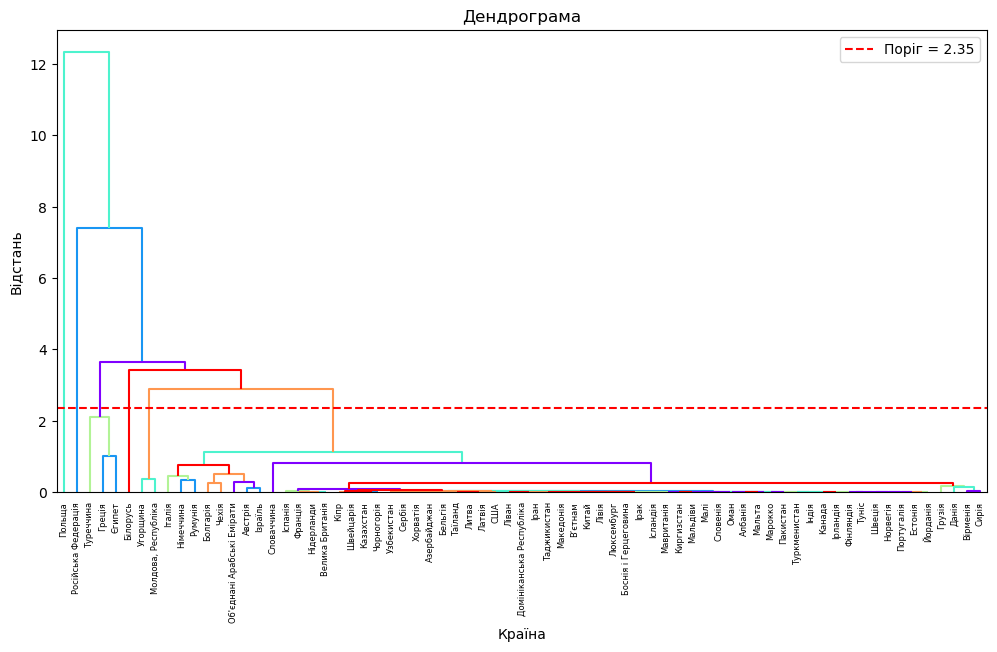

In [600]:
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.index.tolist(), color_threshold=threshold, link_color_func=link_color_func)
plt.title(f'Дендрограма')
plt.xlabel('Країна')
plt.ylabel('Відстань')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Поріг = {threshold:.2f}')
plt.legend()
plt.show()


### Візуалізація кластерів

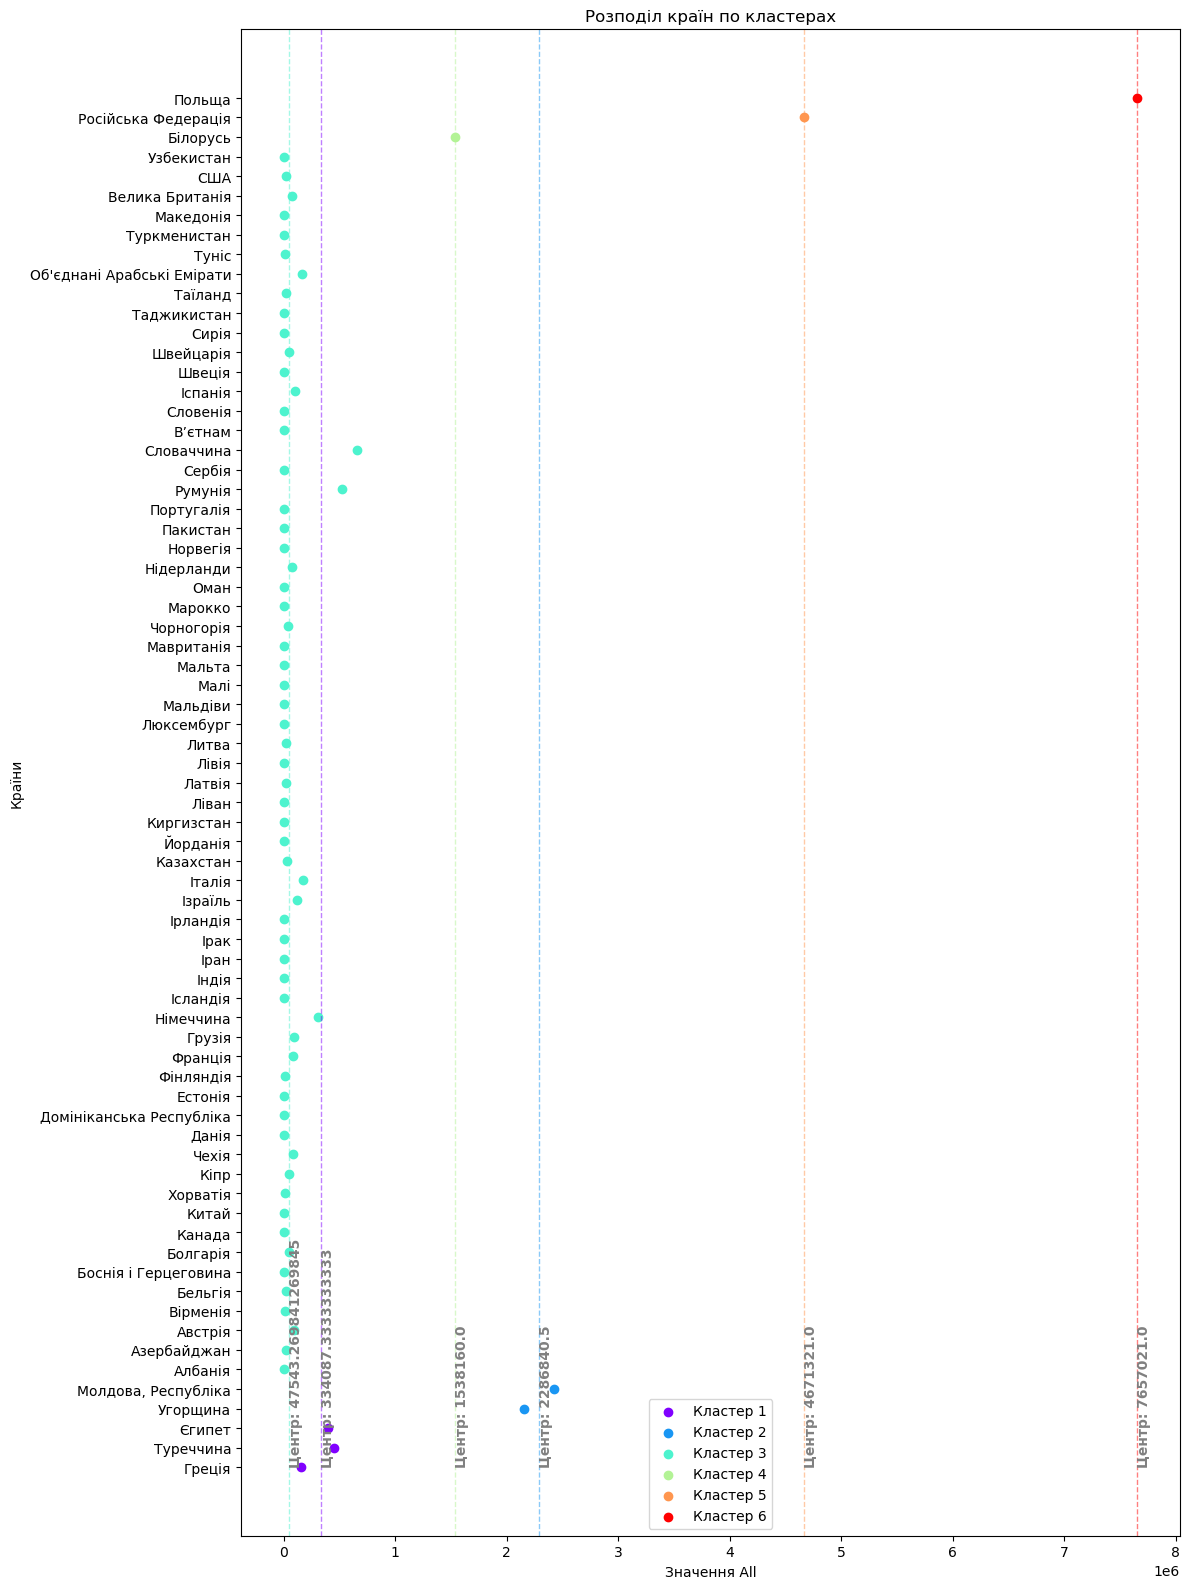

In [604]:
plt.figure(figsize=(12, 16))

for cluster, color in zip(np.unique(clusters_threshold), colors):
    mask = clusters_threshold == cluster
    disp_df_row = dispersion_df[dispersion_df['Cluster'] == cluster]
    dispersion = disp_df_row['Dispersion'].values[0]
    plt.scatter(df[mask]['All'], df[mask].index,
                label=f'Кластер {cluster}', color=color)

    center = float(disp_df_row['Center'].values[0])
    y_positions = np.arange(len(df[mask].index))
    y_min = min(y_positions) if len(y_positions) > 0 else 0
    y_max = max(y_positions) if len(y_positions) > 0 else 0
    plt.axvline(x=center, color=color, linestyle='--',
                alpha=0.5, linewidth=1)

    plt.text(center, 0, f'Центр: {center}',
             rotation=90, verticalalignment='bottom',
             color='gray', fontweight='bold')

plt.title('Розподіл країн по кластерах')
plt.xlabel('Значення All')
plt.ylabel('Країни')
plt.legend()
plt.tight_layout()
plt.show()


### Розподіл розмірів кластерів

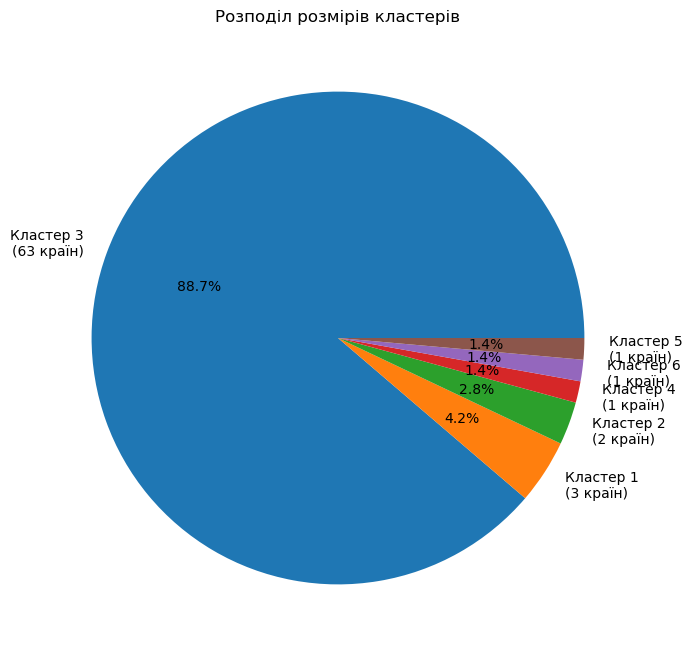

In [602]:
cluster_sizes = pd.Series(clusters_threshold).value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes.values, labels=[f'Кластер {i}\n({v} країн)'
                                      for i, v in cluster_sizes.items()], autopct='%1.1f%%')
plt.title('Розподіл розмірів кластерів')
plt.show()